In [4]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data into a DataFrame
data = pd.read_csv('FilteredData_MorrisLecar_I0_80.csv')

# Remove rows with missing values (NaN)
data = data.dropna()

# Define the predictors: Amp, L, L1, L2, and p2
X = data[['Amp', 'L', 'L1', 'L2', 'p2']].values


# Define the targets: tnextmax, l3max, and p3max
y = data[[ 'tnextmax']].values

In [6]:
# Create the linear regression model
linear_reg_model = LinearRegression()

In [7]:
# Perform k-fold cross-validation with k=5
kf = KFold(n_splits=5, shuffle=True, random_state=42) # cv=5 also works, but this line helps to customize. eg: set seed (random_state = 42)
cv_scores = cross_val_score(linear_reg_model, X, y, cv=kf, scoring='r2') # scoring = r2 means using r^2 to measure performance

In [8]:
# Print the R-squared scores from cross-validation
print("R-squared scores from cross-validation:", cv_scores)
print("Average R-squared score:", cv_scores.mean())

R-squared scores from cross-validation: [0.95483187 0.9543451  0.95397326 0.95484052 0.95557179]
Average R-squared score: 0.9547125079834858


In [9]:
# It is not necessary to do the split as I have done cross validation
# Doing it for future because I might add a bigger data set, so can easily copy and paste this part 
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing sets
# X_train, X_test, y_train, y_test = train_test_split(input_predictors, output_response, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model on the training set
linear_reg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linear_reg_model.predict(X_test)


In [10]:
# Evaluate the model's performance using mean squared error and R-squared
# mse = mean_squared_error(output_response, y_pred)
#r2 = r2_score(output_response, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
#print(f"R-squared: {r2:.2f}")

Mean Squared Error: 32.53


In [11]:
output_range = (data['l3max'].min(), data['l3max'].max())

print("Output variable range:", output_range)

Output variable range: (77.4, 189.4)


C:\Users\Lawan Wijayasooriya\AppData\Local\Temp\ipykernel_12136\3484645632.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, bins=30, kde=True, color='blue', label='Mechanistic Model')
C:\Users\Lawan Wijayasooriya\AppData\Local\Temp\ipykernel_12136\3484645632.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

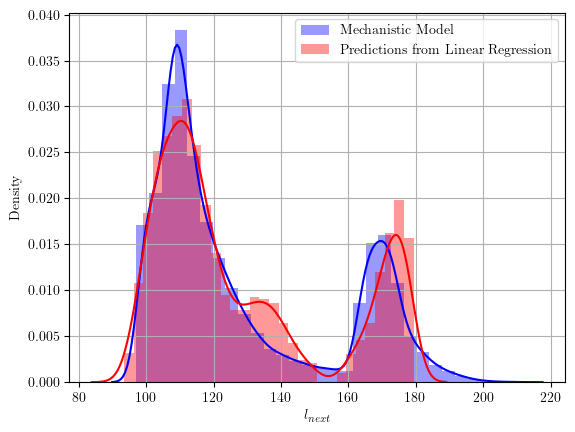

In [13]:
import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns

#
mpl.rcParams['text.usetex'] = True                       # Enable full LaTeX rendering
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']   # Use LaTeX default font
mpl.rcParams['axes.formatter.use_mathtext'] = False      # Disable mathtext formatting so LaTeX is used for all text
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath for \text
# 

# Create histograms with KDE for the predicted values and test data
# sns.distplot(output_response, bins=30, kde=True, color='blue', label='Mechanistic Model')
sns.distplot(y, bins=30, kde=True, color='blue', label='Mechanistic Model')
sns.distplot(y_pred, bins=30, kde=True, color='red', label='Predictions from Linear Regression')

plt.xlabel(r'$l_{next}$')
plt.ylabel(r'$\text{Density}$')  # Now \text is defined because we loaded amsmath.
plt.legend()
plt.grid(True)
plt.savefig('LinRig_comparison2.png', dpi=300, bbox_inches='tight')
plt.show()


In [15]:
# Replace these placeholder values with the actual numeric values for your specific input data
value1 = 15  # Replace with the desired value for Amp
value2 = 10   # Replace with the desired value for L
value3 = 1.8  # Replace with the desired value for L1
value4 = 12   # Replace with the desired value for L2
value5 = -54   # Replace with the desired value for P2



In [17]:
# Create a new data frame with the input data for prediction
input_for_prediction = pd.DataFrame({
    'Amp': [value1],   # Replace value1 with the desired value for Amp
    'L': [value2],   # Replace value2 with the desired value for L
    'L1': [value3],   # Replace value3 with the desired value for L1
    'L2': [value4],  # Replace value5 with the desired value for L2
    'p2': [value5] # Replace value5 with the desired value for p2
})

# Use the linear regression model to make predictions for the new input data
predictions = linear_reg_model.predict(input_for_prediction)

# The variable 'predictions' will now contain the predicted output values for the given input.


C:\Users\Lawan Wijayasooriya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [18]:
print(predictions)

[[129.93726875]]
